# Ejercicio 1
# Normas matriciales.
Se quiere estimar la norma 2 de una matriz $A \in \mathbb{R}^{3x3}$ como el máximo del valor $\frac{∥Ax∥_2}{∥x∥_2}$ entre varios vectores $x\in\mathbb{R}^3$ no nulos generadosal azar. Hacer un programa que reciba una matriz A y luego:

* genere los primeros 100 términos de la siguiente sucesión:
\begin{equation}
s1 = 0, sk+1 = max \{sk, \frac{∥Ax_k∥_2}{∥x_k∥_2}\}
\end{equation}
donde los $x_k\in\mathbb{R}^3$ son vectores no nulos generados al azar en la bola unitaria:
$B = {x : ∥x∥_2 ≤ 1}$.

* Grafique la sucesión calculada, junto con el valor exacto de la norma de la matriz.

Recordar que la norma 2 de un vector v puede calcularse con el comando `np.linalg.norm(v)`, mientras que la norma 2 de una matriz A se puede obtener con `np.linalg.norm(A,2)`. Tener en cuenta que los vectores generados al azar (comando `np.random.random`) tienen coordenadas en el intervalo [0, 1] y por lo tanto abarcan sólo el primer octante en $\mathbb{R}^3$

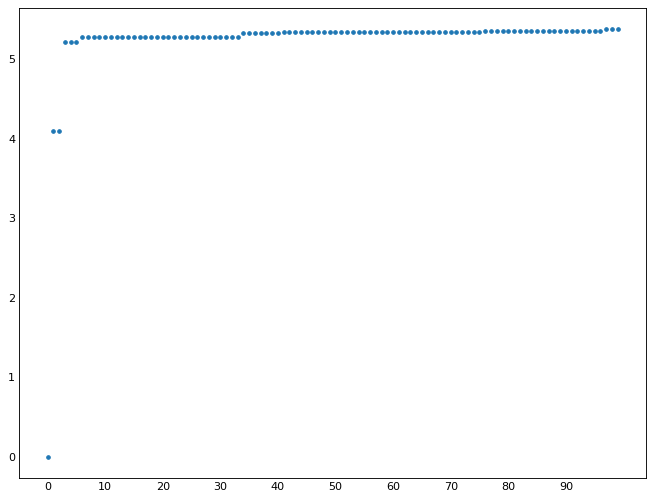

In [ ]:
"""
Lo primero es importar las librerias que necesitaremos
numnpy para el trabajo matematico
matplotlib.pyplot para los graficos
"""

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

#lo primero es armar la matriz A, para ello configuramos sus filas de largo 3
fila1: list[int] = [1,2,3]
fila2: list[int] = [1,1,3]
fila3: list[int] = [1,2,1]

#y armamos la matriz utilizando np.array()

matriz: list[list[int]] = np.array([fila1,fila2,fila3])

#como vamos a armar una sucesion de valores, vamos a utilizar un ciclo for, para ello vamos a inicializar
#la variable donde vamos a guardar los valores de la sucesion s y tambien crear variable n una con el valor de
#cuantos terminos debe tener la sucesion, que en este caso es 100

n: int = 100
s: list[int] = [0]*n
#la variable s estan incializada con 0 para agilizar el guardado de datos de pyhton, esta manera de escribir crea n veces el valor indicado en la lista
#recomendacion, probar que pasa si hacen [1,2]*10

#una vez inicializado los variables necesarias para nuestro ciclo for, vamos a empezar a trabajar con el

for i in range(1,n): #inicio desde el termino 1 de la sucesion porque el primero es 0
    xk: list[float] = np.random.random(3) #genero mi vector random, para indicar la dimension del vector se lo paso como parametro
    Axk: list[float] = matriz @ xk #hago el producto vectorial de A*xk
    norm_2_xk: float = np.linalg.norm(xk,2) #calculo la norma del vecto xk
    norm_2_Axk: float = np.linalg.norm(Axk,2) #calculo la norma de A*^xk
    s[i] = max([s[i-1],norm_2_Axk/norm_2_xk]) #agrego al termino i+1 el valor maximo entre el termino i y el calculo

#con la sucesion calculada, hagamos los graficos, para ello usamos matplotlib

fig, ax = plt.subplots(figsize=(8, 6), dpi=80) #incializo el grafico con subplots, sirve para cuando quiero crear varios graficos en una misma imagen
ax.grid() #agrego grillas
ax.scatter(x= range(0,100), y= s, s=10) #la paso los datos, al pasarle una sola lista, en el eje x pondra el valor del termino de la sucesion y en el y el valor de la sucesion
ax.set_xticks(np.arange(0, 100, 10))

plt.show()

# Ejercicio 2

Resolución de ecuaciones.

(a) Escribir un programa que implemente el método de Jacobi para la resolución
de un sistema lineal Ax = b, con las siguientes condiciones:
* que al inicio calcule el radio espectral del método y que termine si es mayor
o igual a 1,
* que finalice si el método se estaciona,
* que finalice si se excede cierto tope de iteraciones.

(b) Testear el programa desarrollado en el item anterior para los sistemas
\begin{equation*}
\begin{pmatrix}
3 & 1 & 1 \\
2 & 6 & 1 \\
1 & 1 & 4
\end{pmatrix}
\begin{pmatrix}
x1 \\
x2 \\
x3
\end{pmatrix}
 =
\begin{pmatrix}
5\\
9\\
6
\end{pmatrix}
\end{equation*}

\begin{equation*}
\begin{pmatrix}
5 & 7 & 6 & 5\\
7 & 10 & 8 & 7\\
6 & 8 & 10 & 9\\
5 & 7 & 9 &10
\end{pmatrix}
\begin{pmatrix}
x1\\
x2\\
x3\\
x4
\end{pmatrix}
 =
\begin{pmatrix}
23\\
32\\
33\\
31
\end{pmatrix}
\end{equation*}
y analizar los resultados.


## Resolucion a)
Lo primero es recordar en que consiste el metodo de Jacobi. Este metodo es una forma iteractiva de resolver ecuaciones de la forma $Ax = b$. Donde A es una matriz, x son las incognitas del sitema y b un vector.

Para este metodo se descompone la matriz $A$ de la siguiente manera $$A = D + R$$ donde $D$ es la matriz de la diaognal de $A$ y $R = A - D$. Luego $Ax = b ⟺ (D+R)x = b$ Luego si despejamos la "x" nos queda que

$$x = D^{-1}(b - Rx)$$

Luego podemos armar el metodo iteractivo de la forma:

$$x^{k+1} = D^{-1}(b - Rx^{k}) = D^{-1}b - (D^{-1}R)x^{k}$$

Para todo k>0 y x⁰ es un vector aproximado a la solucion.

Luego para que el metodo converga, es necesario que lo haga  $(D^{-1}R)x^{k}$ luego esto pasa Sii

$$ρ(D^{-1}R)<1$$

Ademas como parametro de control vamos a definir el vector resto $r$ como
$$r^{k+1} = b - A*x^{k} $$

Y por otro lado vamos a comparar el estancamiento

In [ ]:
import numpy as np

def descomposicionDR(matriz):
    n,m = matriz.shape
    R = matriz.copy()
    D = matriz.copy()
    for i in range(n):
        for j in range(m):
            if i != j :
                D[i,j] = 0
    R = R - D
    return D,R


def radioEspectralDelMetodo(matriz):
    D,R = descomposicionDR(matriz)
    invD = np.linalg.inv(D)
    metodo = invD @ R
    aval = np.linalg.eigvals(metodo)
    absaval = abs(aval)
    rho =  max(absaval)
    return rho



matriz = np.array([[3,1,1],
                  [2,6,1],
                  [1,1,4]]
)

print(descomposicionDR(matriz))
print(radioEspectralDelMetodo(matriz))

(array([[3, 0, 0],
       [0, 6, 0],
       [0, 0, 4]]), array([[0, 1, 1],
       [2, 0, 1],
       [1, 1, 0]]))
0.5575346466519524
